<a href="https://colab.research.google.com/github/bhagyamchandrapati/timeseries_public/blob/main/timeseries_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                        timestamp  timestamp_mapped  cpu_temperature
0      2024-11-26 22:48:52.742420       1000.000000        96.507714
1      2024-11-26 22:48:52.742420       1000.003858        96.507714
2      2024-11-26 22:48:53.267875       1000.007717        96.507714
3      2024-11-26 22:48:52.742420       1000.011575        96.507714
4      2024-11-26 22:48:53.267875       1000.015434        96.507714
...                           ...               ...              ...
259165 2024-11-26 22:50:07.082771       1999.984566        96.507714
259166 2024-11-26 22:50:07.303517       1999.988425        96.507714
259167 2024-11-26 22:50:07.524978       1999.992283        96.507714
259168 2024-11-26 22:50:07.747759       1999.996142        96.507714
259169 2024-11-26 22:50:07.981972       2000.000000        96.507714

[259170 rows x 3 columns]


<ipython-input-4-a0aeafb1bc94>:54: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['rounded_time'] = df['timestamp'].dt.round(aggregation_interval)


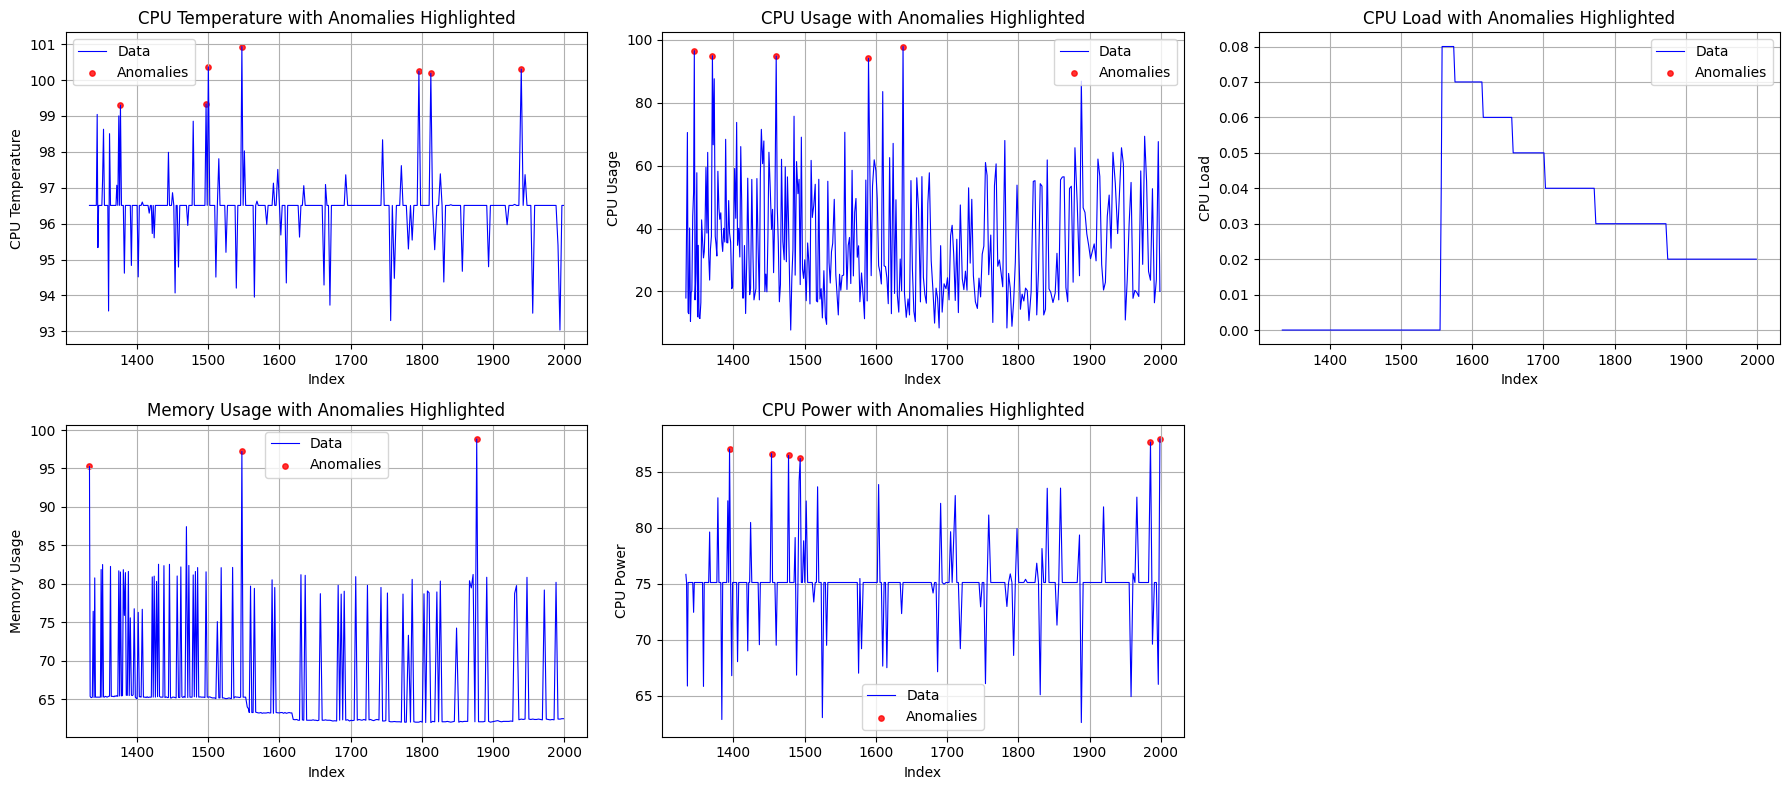

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Sample Data (assuming it's loaded into a DataFrame)
df = pd.read_csv(r'./hardware_monitor_data.csv', header=None)

df.columns = ['timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'battery_level','cpu_power']

df['cpu_temperature'] = df['cpu_temperature'].fillna(df['cpu_temperature'].median())
df['cpu_load'] = df['cpu_load'].fillna(df['cpu_load'].median())
df['memory_usage'] = df['memory_usage'].fillna(df['memory_usage'].median())
df['battery_level'] = df['battery_level'].fillna(df['battery_level'].median())
df['cpu_power'] = df['cpu_power'].fillna(df['cpu_power'].median())
df['battery_level']= df['battery_level'].astype(int)
df['cpu_usage']= df['cpu_usage'].fillna(df['cpu_usage'].median())

df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp to datetime

df['zscore_cpu_temp'] = zscore(df['cpu_temperature'])
df['zscore_cpu_usage'] = zscore(df['cpu_usage'])
df['zscore_memory_usage'] = zscore(df['memory_usage'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 1: Convert timestamps to numeric (e.g., number of seconds since the first timestamp)
min_time = df['timestamp'].min()
df['timestamp_numeric'] = (df['timestamp'] - min_time).dt.total_seconds()

# Step 2: Apply np.linspace to map the numeric timestamp values to the range [1000, 2000]
num_points = len(df)
df['timestamp_mapped'] = np.linspace(1000, 2000, num_points)

# Print the DataFrame with the mapped numeric timestamps
print(df[['timestamp','timestamp_mapped','cpu_temperature']])
#print(df['cpu_usage'])
#print(df['cpu_load'])
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_aggregated_data(df, metrics, aggregation_interval='0.5S', subplots_per_row=3):
    """
    Plot aggregated data for given metrics with anomalies highlighted.

    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp' and metrics.
        metrics (list of tuples): List of tuples with metric names and labels, e.g., [('cpu_power', 'CPU Power'), ('memory_usage', 'Memory Usage')].
        aggregation_interval (str): Interval for rounding timestamps, default is '0.5S'.
        subplots_per_row (int): Number of subplots per row, default is 3.
    """
    # Round timestamps to the nearest interval
    df['rounded_time'] = df['timestamp'].dt.round(aggregation_interval)

    # Aggregate data
    df_aggregated = df.groupby('rounded_time').mean().reset_index()

    # Determine grid layout based on the number of metrics
    num_metrics = len(metrics)
    rows = math.ceil(num_metrics / subplots_per_row)

    # Create figure and subplots
    fig, axs = plt.subplots(rows, subplots_per_row, figsize=(6 * subplots_per_row, 4 * rows))
    axs = axs.flatten()  # Flatten for simpler indexing

    for idx, (metric, label) in enumerate(metrics):
        mean_val = df_aggregated[metric].mean()
        std_val = df_aggregated[metric].std()
        threshold = mean_val + (3 * std_val)

        # Identify anomalies
        anomalies = df_aggregated[df_aggregated[metric] > threshold]

        # Plot data on the current subplot
        ax = axs[idx]
        ax.plot(df_aggregated['timestamp_mapped'], df_aggregated[metric], label='Data', linewidth=0.8, color='blue')
        ax.scatter(anomalies['timestamp_mapped'], anomalies[metric], color='red', label='Anomalies', s=15, alpha=0.8)

        # Add labels, legend, and title
        ax.set_xlabel('Index')
        ax.set_ylabel(label)
        ax.set_title(f'{label} with Anomalies Highlighted')
        ax.legend()
        ax.grid()

    # Hide unused subplots
    for ax in axs[num_metrics:]:
        ax.axis('off')

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

# Metrics to plot: 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power'
metrics_to_plot = [
    ('cpu_temperature', 'CPU Temperature'),
    ('cpu_usage', 'CPU Usage'),
    ('cpu_load', 'CPU Load'),
    ('memory_usage', 'Memory Usage'),
    ('cpu_power', 'CPU Power')# Add more metrics as needed
]

# Call the function
plot_aggregated_data(df, metrics_to_plot)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')